#Tuesday 3/11/2020

**Data Description - معلومات ( وصف )للبيانات**

**Source of the data**:

https://www.kaggle.com/mirichoi0218/insurance


**General Information about the Business Problem**:

In order for insurance companies to achieve high profits, they must collect premiums higher than the amount paid to the insured person
As a result, insurance companies invest a lot of time, effort and money creating models that accurately predict health care costs

The dataset contains the following features



| # Number of variable | Column names | Description | Data type |
| --- | --- | --- |--- |
| 1 | age | Clients age | int64   |.843 |
| 2 | sex| Clients Gender | Object |.843 |
| 3 | bmi  |Body Mass Index | float64 |.843 |
| 4 | children | Number of Childrens that the clients got | int64   |.843 |
| 5 | smoker    |Is the Client Smoker or not | object |.843 |
| 6 | region|Sate area| object |.843 |
| 7 | charges    |   Charges of the clients | float64 |.843 |

**The Output is going to be Insurance costs for the client**
The Soultion is : 
Can you accurately predict insurance costs?

### Let's Load Some libraries


In [4]:
import numpy as np #for mathmatical computations 
import pandas as pd #for dataframes (dpylr)
import seaborn as sns 
import matplotlib.pyplot as plt 


Numpy for Mathmatical Calculations - Pandas for Data Manipulations - Matplotlib and Seaborn for Data Visualization


In [5]:
#Here I am reading the dataset and assigning a df as a variable and reading the first 5 rows of the dataset
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Assess the dataset for missingness
**How many observations have missing values?** 0 Missing values
Plot the missing values. Does there appear to be any patterns to the missing values?
How do you think the different imputation approaches would impact modeling results? 

In [6]:
df.isna().sum()
#we use this function to know if there are any missing values or not and as we can see there are no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.shape
#this function shows how many rows and columns do we have 
#we have 7 Columns and 1338 rows 

(1338, 7)

In [8]:
df.info()
#This function shows how many rows we have and their data types and the missing values as well 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.columns
#this function tells us the name of the columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
df.mean()
#this function tells us the mean of the numerical features , as you see the catagorical features aren't showing here

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [11]:
df.std()
#this function calculates the Stanard deviatoin

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [12]:
df.describe()
#this one gives us the five number summary

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
for col in df:
    print(df[col].value_counts(ascending=False), '\n\n\n')
    #here we can know the count of the numerical values , there are 676 males and 662 females ,thre are 13 people with 32.300 BMI

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64 



male      676
female    662
Name: sex, dtype: int64 



32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64 



0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 



no     1064
yes     274
Name: smoker, dtype: int64 



southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64 



1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1


In [14]:
df.corr()
#this function tell us the correlation between features

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


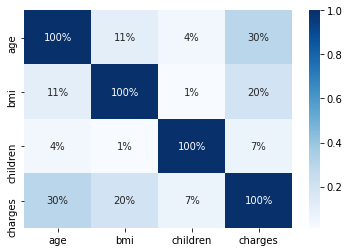

In [15]:
sns.heatmap(df.corr(),annot=True, fmt='.0%',cmap="Blues")
#cmap="YlGnBu"
 #cmap="Blues"
 #cmap="BuPu"
#cmap="Greens"
#This function draws me a heat map, helping us find the relationship between variables,
# the same information as in the previous cell, but in the form of a graph


<font color=red>**Let's Answer some Questions! :**</font>



**How many smokers do we have?**

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

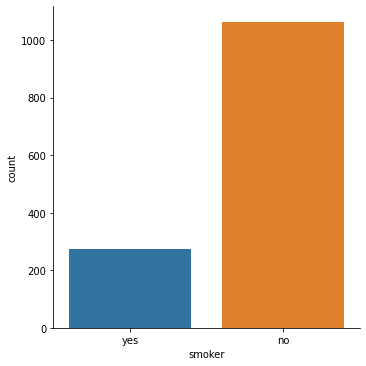

In [18]:
#sns.countplot(df['smoker'],label='count')
sns.catplot(x ='smoker', data=df, kind="count")
#here we can see a plot that shows how many smokers do we have in our dataset

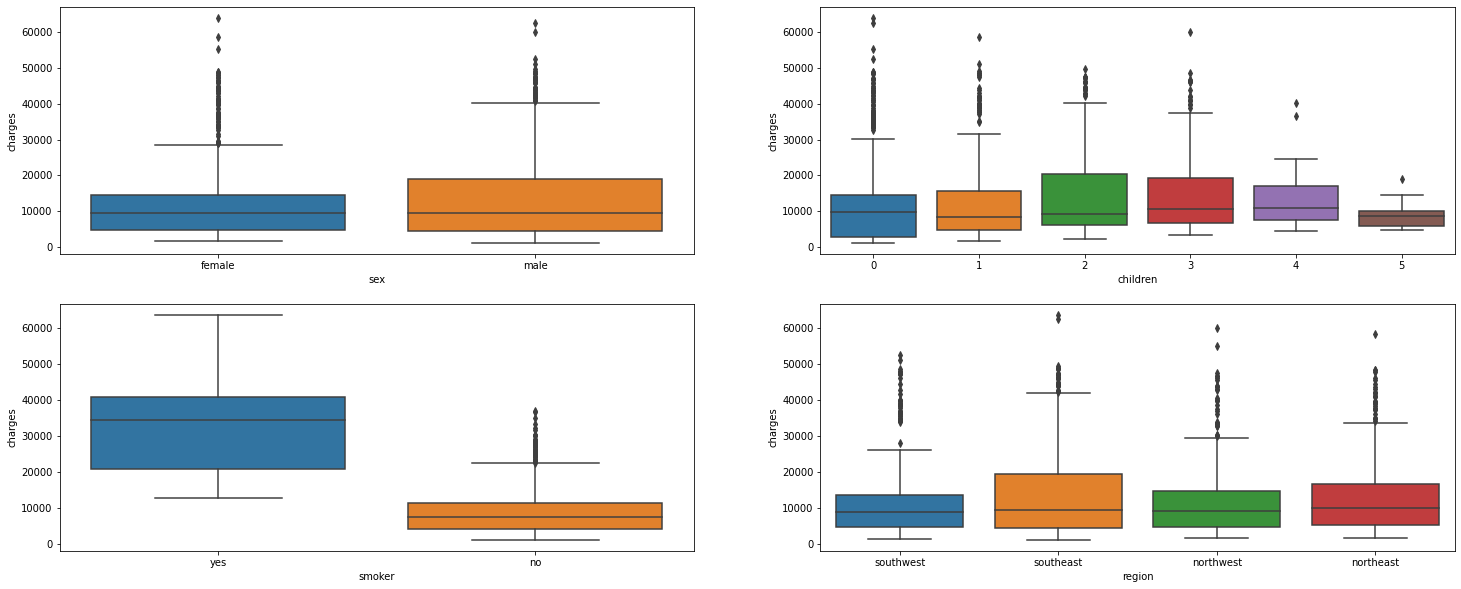

In [17]:
# Here we are going to plot a boxplot for all the  Categorical features

plt.figure(figsize=(25, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = df)
plt.show()

**The Information we get from the Boxplots**

1- we have 4 catagorical features
2- The data is biased towards males since we have 50.5 % Males and 49.5% females , because the percentile in males is larger than the females

3-3- In terms of the variable  smoking  represents 20% of the data, where the median is higher than the data for non-smokers


4- In terms of the variable  children , who have two children are the highest as the data distribution is from 50 to 75 person

5- In terms of the variable  region , the population of the region, the Southeast, is the highest in terms of distribution, representing from 50 to 75 percent.

**here we can see that males charges are higher than females**

Text(0.5, 1.0, 'sex vs charges')

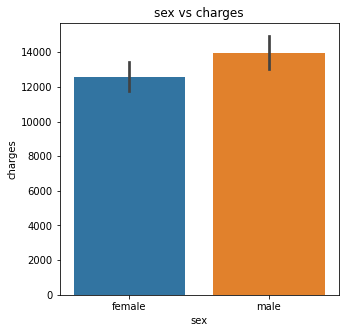

In [ ]:
plt.figure(figsize = (5, 5))
sns.barplot(x = 'sex', y = 'charges', data = df)

plt.title('sex vs charges')

**Here we can see a linear regression between Age  and Charges**

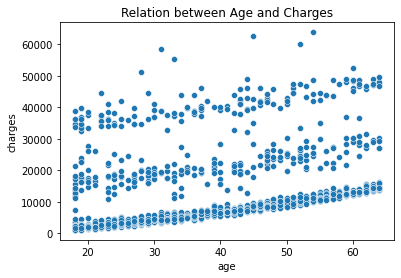

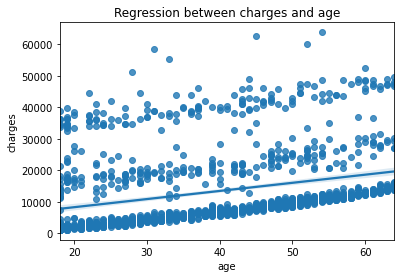

In [37]:

plt.title("Relation between Age and Charges")
sns.scatterplot(x=df['age'],y=df['charges'])
plt.show()
plt.title('Regression between charges and age')
sns.regplot(x=df['age'],y=df['charges'])
plt.show()

# We can notice that the elderly pay more for insurance, so age plays an important role when insuring

## إيجاد علاقة بين مؤشر كتلة الجسم والرسوم عن طريق رسم مخطط سكاتر بلوت

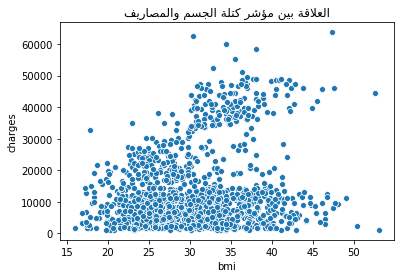

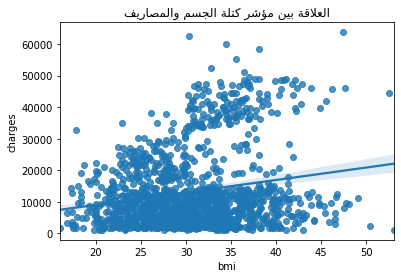

In [ ]:
plt.title('ﻒﻳﺭﺎﺼﻤﻟﺍﻭ ﻢﺴﺠﻟﺍ ﺔﻠﺘﻛ ﺮﺷﺆﻣ ﻦﻴﺑ ﺔﻗﻼﻌﻟﺍ')
sns.scatterplot(x=df['bmi'],y=df['charges'])
plt.show()
plt.title('ﻒﻳﺭﺎﺼﻤﻟﺍﻭ ﻢﺴﺠﻟﺍ ﺔﻠﺘﻛ ﺮﺷﺆﻣ ﻦﻴﺑ ﺔﻗﻼﻌﻟﺍ')
sns.regplot(x=df['bmi'],y=df['charges'])
plt.show()

**من المخطط سكاتر بلوت نجد انه هناك ارتباط ايجابي بين العملاء ذوو مؤشر كتلة الجسم مرتفعة والرسوم التأمين**

**حيث العملاء ذوو مؤشر كتلة الجسم المرتفعة عادة إلى دفع المزيد في تكاليف التأمين**

## إيجاد علاقة بين المدخنين والرسوم عن طريق رسم مخطط سكاتر بلوت

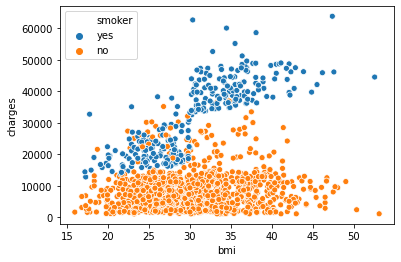

In [ ]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

**هنا الرسم البياني يظهر لنا ان الغير مدخنين  الذين لديهم مؤشر كتلة الجسم عالية اكثر بقليل عن المدخنين**
والمدخنون يدفعون اكثر ، وسأقوم برسم خطين انحدار للمدخنين وغير المدخنين

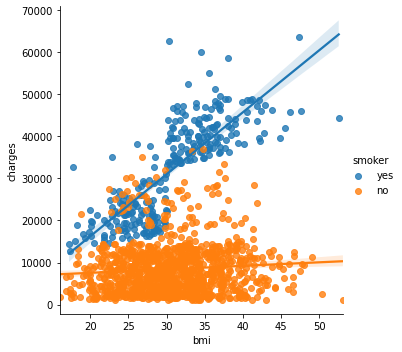

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

**يمكننا أن نلاحظ أن خط الانحدار للمدخنين له منحدر أكثر حدة ، مقارنة بخط غير المدخنين**

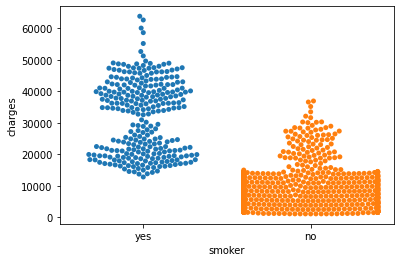

In [ ]:
sns.swarmplot(x=df['smoker'],y=df['charges'])

## في المتوسط ​​، يُدفع غير المدخنين أقل من المدخنين ، والعملاء الذين يدفعون أكثر هم من المدخنين ، في حين أن العملاء الذين يدفعون أقل هم من غير المدخنين. وبالتالي ، تحدد عادات التدخين رسوم التأمين

## إيجاد علاقة بين الأطفال والرسوم عن طريق رسم البياني

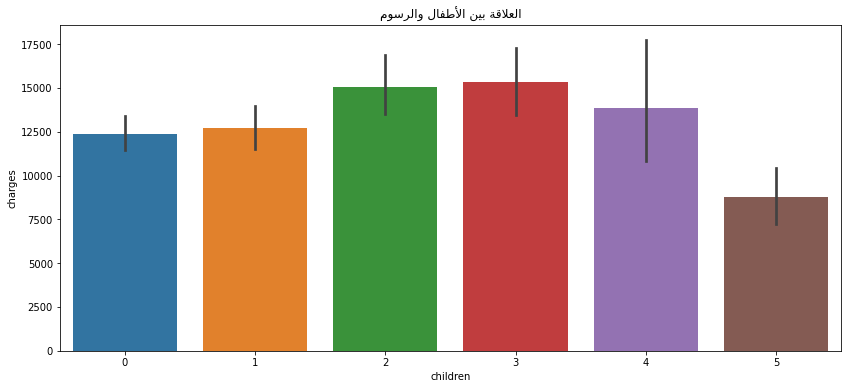

In [ ]:
plt.figure(figsize=(14,6))
plt.title('ﻡﻮﺳﺮﻟﺍﻭ ﻝﺎﻔﻃﻷﺍ ﻦﻴﺑ ﺔﻗﻼﻌﻟﺍ')
sns.barplot(x=df['children'], y=df['charges'])

## الشخص الذي لديه طفلين او ثلاثة اطفال يدفعون رسوم اكثر اما الشخص الذي لديه خمسة اطفال يدفع اقل!!